**TASK-4 Exploratory Data Analysis -  Terrorism**

**IMPORTING THE LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import folium
from folium.plugins import MarkerCluster

**LOADING THE DATASET**

In [4]:
df= pd.read_csv("/content/sample_data/globalterrorismdb_0718dist.csv",encoding='latin1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14259 entries, 0 to 14258
Columns: 135 entries, eventid to related
dtypes: float64(74), int64(7), object(54)
memory usage: 14.7+ MB


In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.425900e+04,14259.000000,14259.000000,14259.000000,14259.000000,14259.000000,14259.000000,13772.000000,13772.000000,14258.000000,14258.000000,14258.000000,14258.000000,14258.000000,14258.000000,1858.000000,14258.000000,14258.000000,14258.0,14258.000000,24.000000,2.000000,14258.000000,13408.000000,14218.000000,192.000000,137.000000,166.000000,20.000000,12.000000,20.000000,0.0,0.0,0.0,14258.000000,31.000000,0.0,14258.000000,3068.000000,912.000000,...,233.000000,9.000000,8.000000,0.0,0.0,0.0,18.000000,14258.000000,11420.00000,868.000000,746.000000,114.000000,101.000000,18.000000,15.000000,12175.000000,1263.000000,1364.000000,10792.000000,1234.000000,1236.000000,14258.000000,6407.000000,3.299000e+03,14104.000000,1183.000000,1183.000000,337.000000,250.000000,14008.000000,3.900000e+02,1.0,8.300000e+01,1.0,573.000000,448.000000,14258.000000,14258.000000,14258.000000,14258.000000
mean,1.977436e+11,1977.372537,6.181079,15.198261,0.021530,192.658461,5.705940,29.405349,-25.804561,1.228994,0.009959,0.991303,0.990251,0.898794,-1.522303,1.289020,0.048183,0.904264,0.0,3.194066,4.708333,3.000000,6.630102,39.480832,145.659727,9.416667,50.569343,178.542169,7.000000,45.416667,161.750000,NaN,NaN,NaN,0.039276,0.387097,NaN,0.002455,-14.423403,-80.486842,...,4.424893,0.888889,2.750000,NaN,NaN,NaN,0.444444,6.662786,10.79711,6.321429,9.576408,6.052632,6.495050,6.166667,9.133333,1.199918,0.184481,0.348974,1.253706,0.394652,0.051780,0.598261,3.428906,1.829172e+05,0.083877,-7.841082,0.253593,2.570475,30.572000,0.027913,3.801887e+06,20000.0,1.426646e+06,0.0,2.895288,7.303571,-3.559896,-3.512344,0.285734,-2.428111
std,3.139999e+08,3.143381,3.360118,8.980147,0.145149,175.618845,3.355184,22.209016,55.534477,0.866373,0.099302,0.092854,0.098258,0.301612,3.561831,0.578653,0.214161,0.294239,0.0,2.040586,2.475606,1.414214,6.091475,30.068946,80.755681,6.914840,28.708165,81.189983,5.991222,25.061591,66.262536,NaN,NaN,NaN,0.194258,0.495138,NaN,0.049486,57.513563,39.140713,...,2.986273,0.333333,2.964071,NaN,NaN,NaN,0.511310,2.409397,7.05308,1.858712,6.888386,1.981517,6.221935,1.248529,6.621034,6.507691,1.060759,2.589823,7.627515,2.460524,0.320281,0.877854,0.526145,1.780330e+06,0.277213,138.764771,4.440424,56.031099,71.603359,0.164728,5.094505e+07,NaN,4.988971e+06,NaN,1.272158,26.432842,4.524166,4.573991,0.647098,4.484891
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,21.000000,1.000000,8.000000,45.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,2.000000,1.00000,2.000000,2.000000,5.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.976020e+11,1976.000000,3.000000,7.000000,0.000000,69.000000,2.000000,13.743611,-80.214195,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.

In [7]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999853,-0.075357,-0.008452,-0.055358,-0.328688,0.041676,-0.243733,0.043475,0.105029,0.040691,-0.065465,0.023312,-0.015582,-0.121323,-0.174689,-0.121568,0.034678,NaN,-0.028185,0.263212,1.0,0.028269,0.029035,-0.349478,-0.063376,-0.053278,-0.429506,0.325677,0.447069,-0.275628,NaN,NaN,NaN,0.026274,-0.318580,NaN,-0.007175,0.551864,0.263032,...,-0.042269,0.769766,-0.062608,NaN,NaN,NaN,0.293754,0.042453,-0.200538,-0.052200,-0.116987,-0.248852,-0.307956,-0.222158,-0.244160,0.069974,0.054295,0.117199,0.025392,0.003865,0.198522,0.114983,0.294212,0.030346,0.018003,-0.038940,0.012427,0.085401,-0.030034,-0.021171,0.012949,NaN,-0.108401,NaN,0.093882,-0.039949,-0.064173,-0.067977,-0.203258,-0.153194
iyear,0.999853,1.000000,-0.086104,-0.008597,-0.055396,-0.328552,0.041863,-0.243160,0.043684,0.105406,0.040703,-0.066528,0.023334,-0.015669,-0.121046,-0.174713,-0.121464,0.034594,NaN,-0.027798,0.264334,1.0,0.028289,0.029008,-0.348880,-0.063415,-0.053518,-0.429722,0.325119,0.446718,-0.277766,NaN,NaN,NaN,0.026250,-0.322311,NaN,-0.007228,0.551200,0.265311,...,-0.029162,0.762493,-0.063758,NaN,NaN,NaN,0.328965,0.042749,-0.200286,-0.051611,-0.116329,-0.248164,-0.306309,-0.217186,-0.235628,0.069887,0.053258,0.116535,0.025275,0.003188,0.197880,0.114828,0.294944,0.029970,0.017942,-0.038690,0.012371,0.086298,-0.031330,-0.021000,0.013409,NaN,-0.111280,NaN,0.093431,-0.039628,-0.064376,-0.068174,-0.203579,-0.153464
imonth,-0.075357,-0.086104,1.000000,0.002492,0.007537,0.019712,-0.015103,-0.015858,-0.016020,-0.048279,-0.006873,-0.005746,-0.003154,0.013642,-0.009215,0.017036,-0.000031,0.007945,NaN,-0.037979,-0.133244,NaN,-0.013000,-0.009651,-0.014531,0.011590,0.035979,0.051675,-0.046486,-0.124924,0.237629,NaN,NaN,NaN,-0.002507,0.342635,NaN,0.004499,0.043309,0.004122,...,0.039140,0.598597,0.144383,NaN,NaN,NaN,0.252422,-0.037635,-0.016018,-0.043283,-0.040780,0.034480,-0.018511,-0.123583,-0.253875,0.000026,0.073664,0.032175,0.007402,0.051207,0.002508,-0.004435,-0.092009,0.028674,0.001064,-0.017635,0.003473,-0.096781,0.115053,-0.014247,-0.042725,NaN,0.226598,NaN,0.031470,-0.025642,0.012737,0.012700,0.045477,0.025331
iday,-0.008452,-0.008597,0.002492,1.000000,0.000814,0.028804,0.010273,0.017052,0.014141,-0.015912,0.007472,0.018882,-0.006247,-0.009748,0.003484,-0.035233,0.004979,-0.004215,NaN,-0.055863,-0.086434,-1.0,0.015671,0.007671,0.022082,-0.093485,-0.088981,-0.153414,0.186803,0.223098,-0.448991,NaN,NaN,NaN,-0.010875,-0.506407,NaN,-0.005983,-0.025546,-0.029191,...,0.077770,0.067574,-0.360306,NaN,NaN,NaN,-0.266160,-0.037350,-0.008208,0.045680,-0.015962,0.039959,0.117758,0.227284,-0.019121,-0.002646,-0.017466,0.033460,0.006857,-0.019343,0.019880,0.003129,0.002344,0.005470,-0.013981,-0.005641,0.009269,-0.049703,0.059240,-0.007194,0.009333,NaN,0.015172,NaN,0.060130,-0.034858,0.007335,0.006415,0.017642,0.015222
extended,-0.055358,-0.055396,0.007537,0.000814,1.000000,-0.077976,-0.027755,-0.091168,-0.018122,0.040548,-0.005146,-0.012126,0.014719,0.033757,-0.040788,0.006911,-0.017582,0.046625,NaN,0.173440,0.222906,NaN,-0.034622,-0.025173,-0.015565,0.014250,0.030998,-0.111380,0.399576,-0.042933,-0.540633,NaN,NaN,NaN,-0.017556,NaN,NaN,0.012171,0.088345,0.088453,...,0.177669,NaN,NaN,NaN,NaN,NaN,-

In [8]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

**US Terror Attacks and Death Injuries**

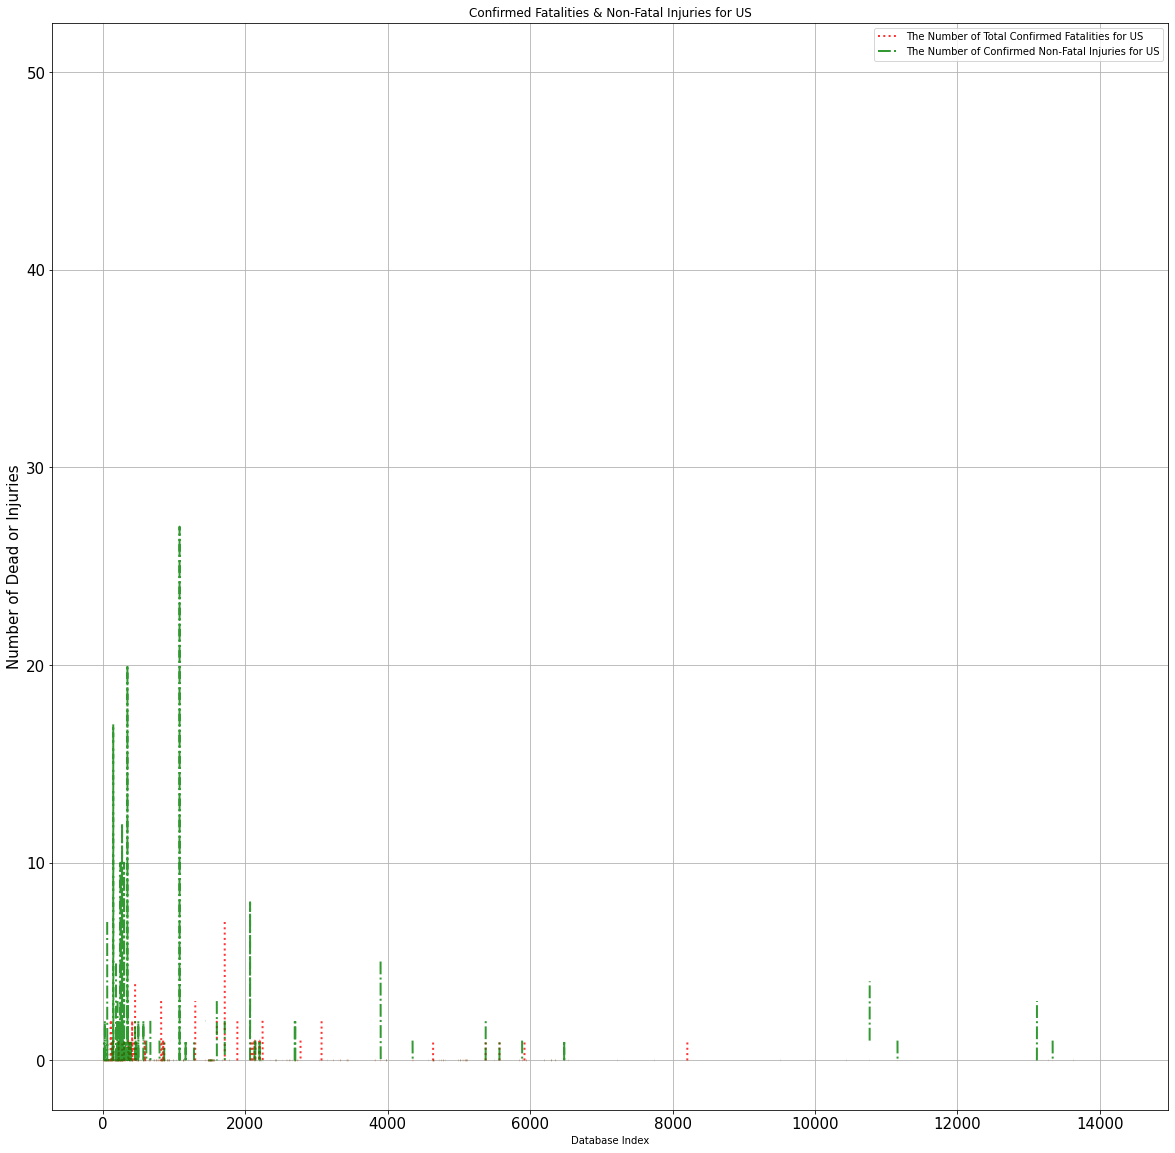

In [9]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

**Death and Injuries at all time**

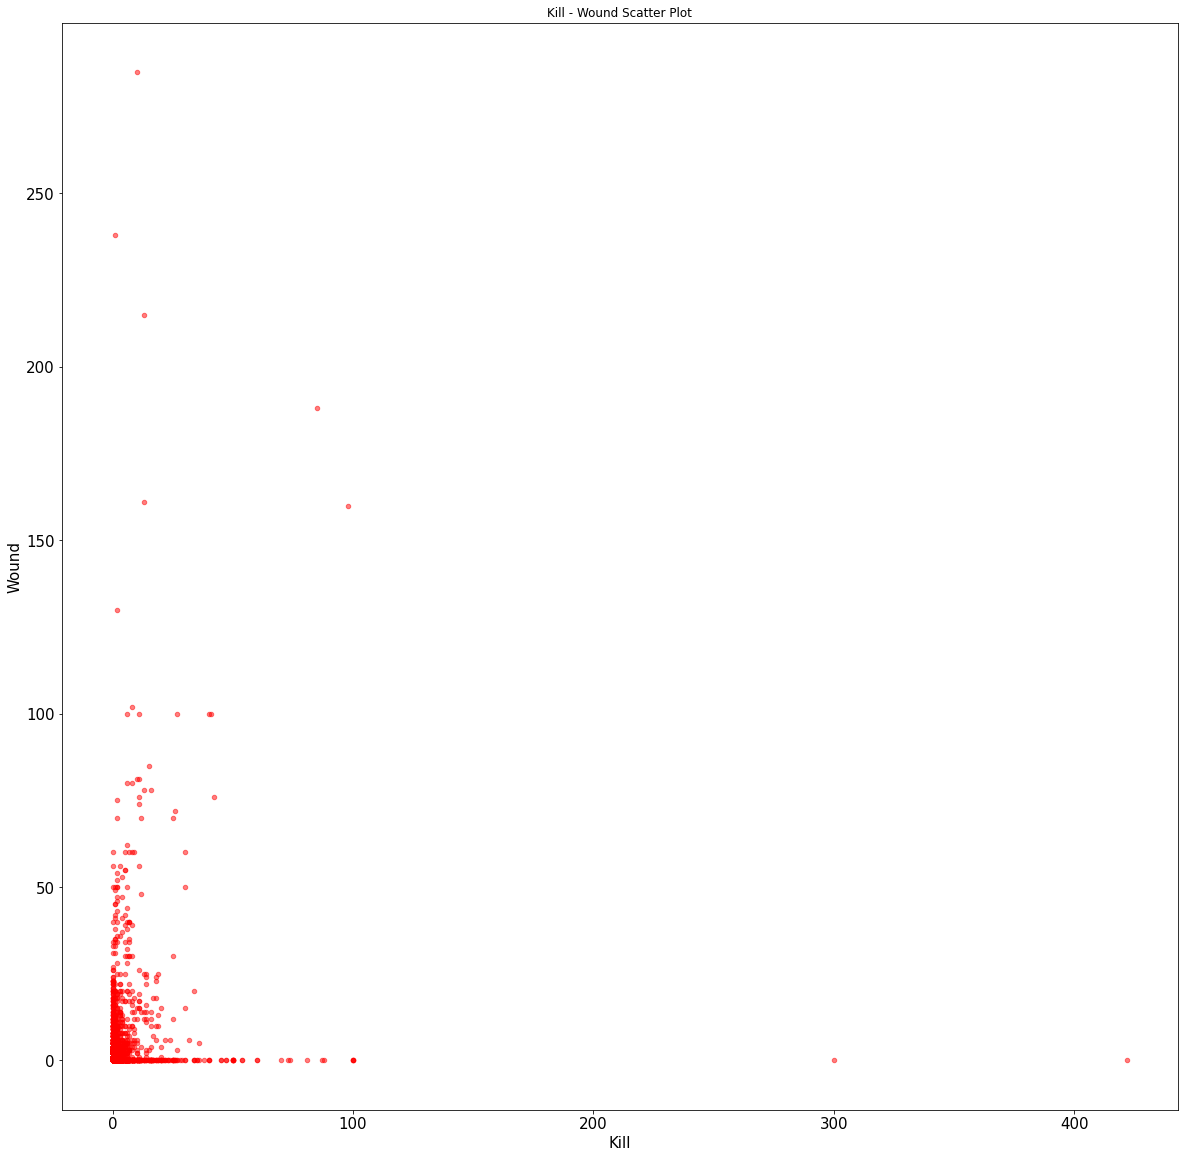

In [10]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

In the majority of acts of terrorism, the mortality rate and injuries were low, but a small number of actions led to too many deaths and injuries.

**Frequency of Terrorist Actions in Customized Region**

Let's analyze in Middle East and North Africa 

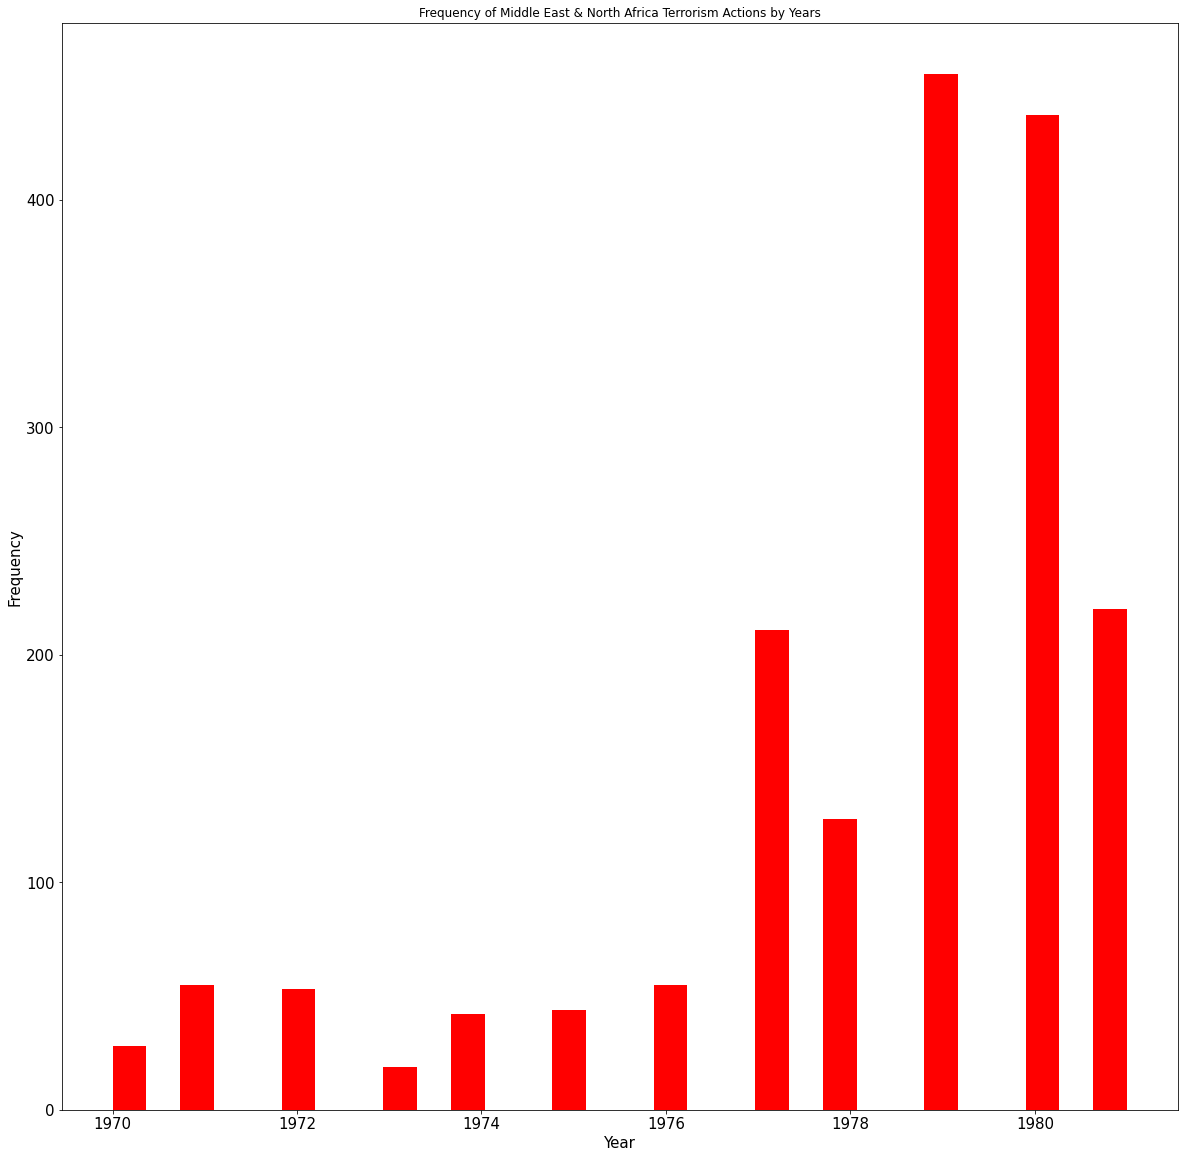

In [11]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

Terrorist attacks have increased in recent years.

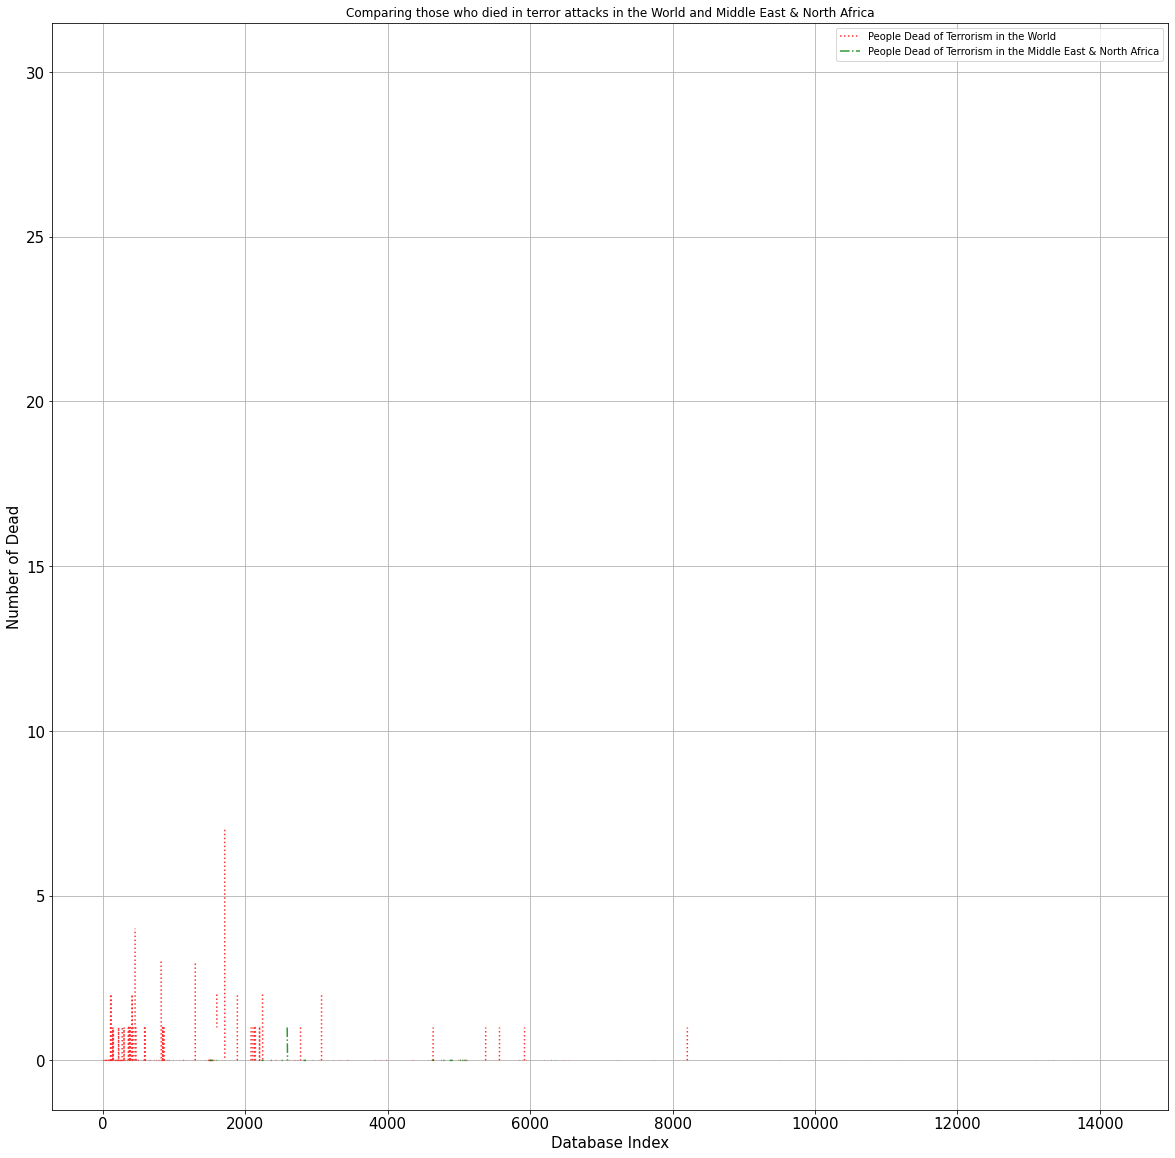

In [12]:

df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

**Terrorist Attacks of a Particular year and their Locations**

Let's look at the terrorist acts in the world over a certain year


In [13]:
filterYear = df['iyear'] == 1970

In [16]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [17]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 14609


In [18]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)


In [19]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,6112.0,3010.0,3430.0,552.0,184.0,212.0,331.0,17.0,761.0


In [20]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


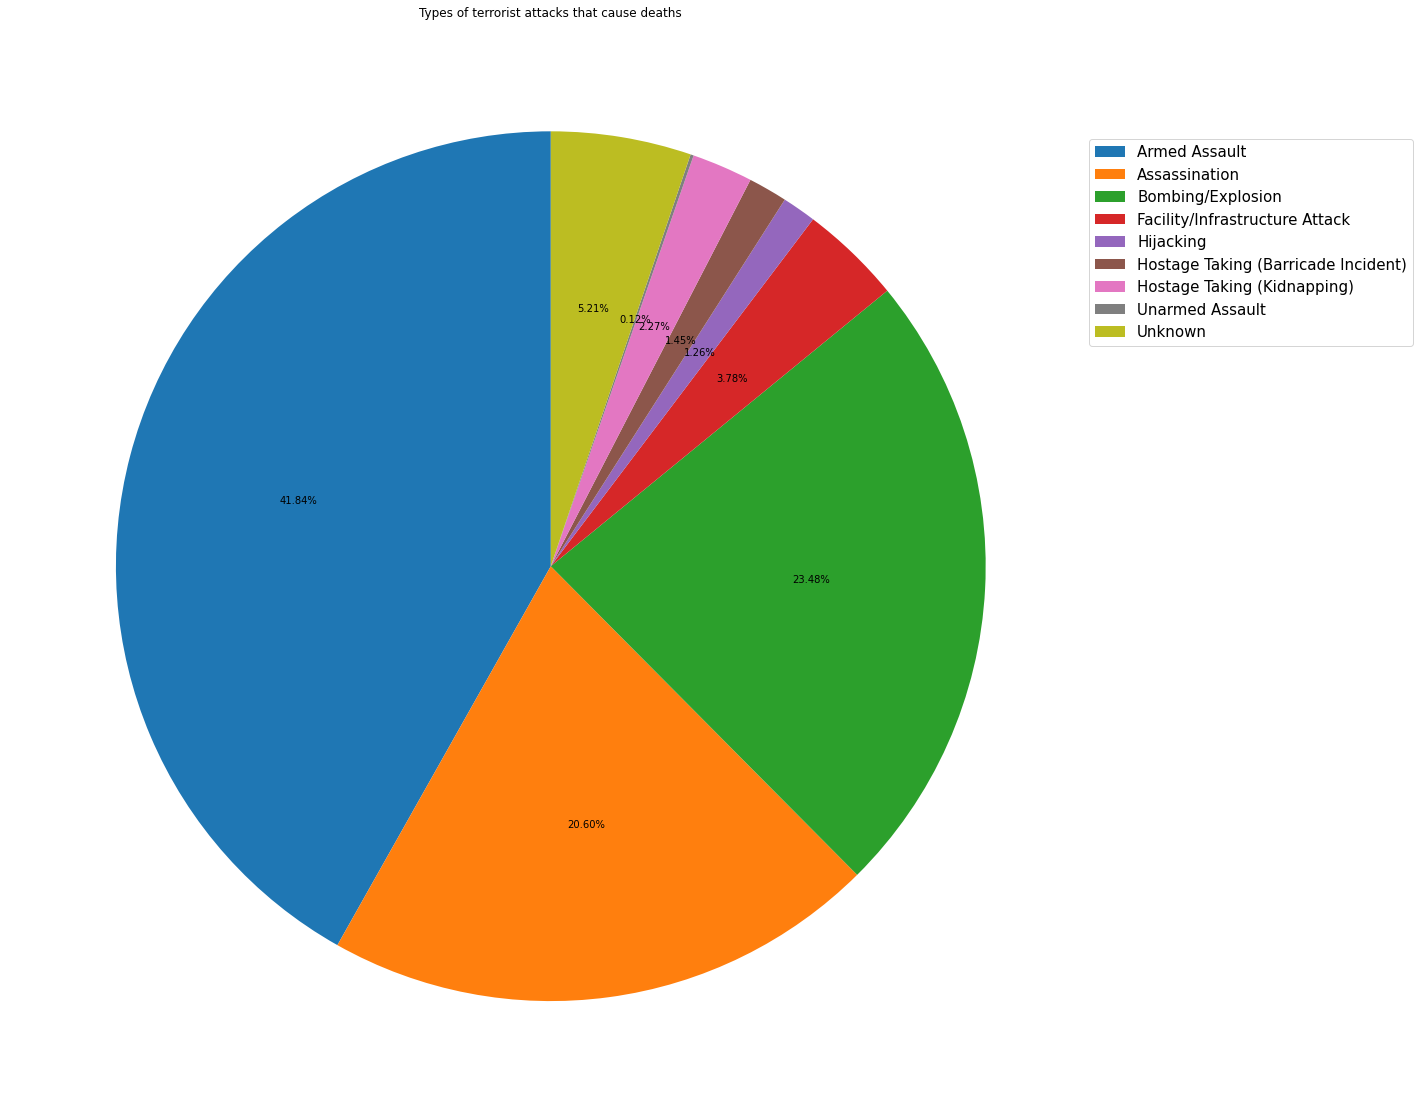

In [21]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

**Number of Killed in Terrorist Attacks by Countries**

In [22]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,Barbados,Belgium,Belize,Bolivia,Botswana,Brazil,Brunei,Cambodia,Canada,Central African Republic,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Denmark,Djibouti,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,France,Gabon,Greece,Grenada,Guadeloupe,...,Peru,Philippines,Poland,Portugal,Rhodesia,Saudi Arabia,Senegal,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Tunisia,Turkey,Uganda,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,53.0,0.0,0.0,0.0,19.0,328.0,5.0,12.0,0.0,0.0,12.0,73.0,7.0,0.0,12.0,1.0,27.0,0.0,4.0,2.0,3.0,0.0,14.0,691.0,7.0,22.0,26.0,0.0,5.0,6.0,1.0,8.0,9.0,3956.0,135.0,79.0,2.0,124.0,9.0,1.0,...,10.0,664.0,0.0,9.0,217.0,5.0,0.0,0.0,1.0,50.0,1.0,81.0,0.0,4.0,467.0,3.0,5.0,6.0,50.0,256.0,25.0,1.0,183.0,0.0,41.0,321.0,70.0,10.0,1896.0,204.0,4.0,0.0,5.0,46.0,63.0,0.0,2.0,1.0,5.0,26.0


In [23]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 121 entries, Afghanistan to Zimbabwe
dtypes: float64(121)
memory usage: 976.0+ bytes


In [24]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

In [25]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 

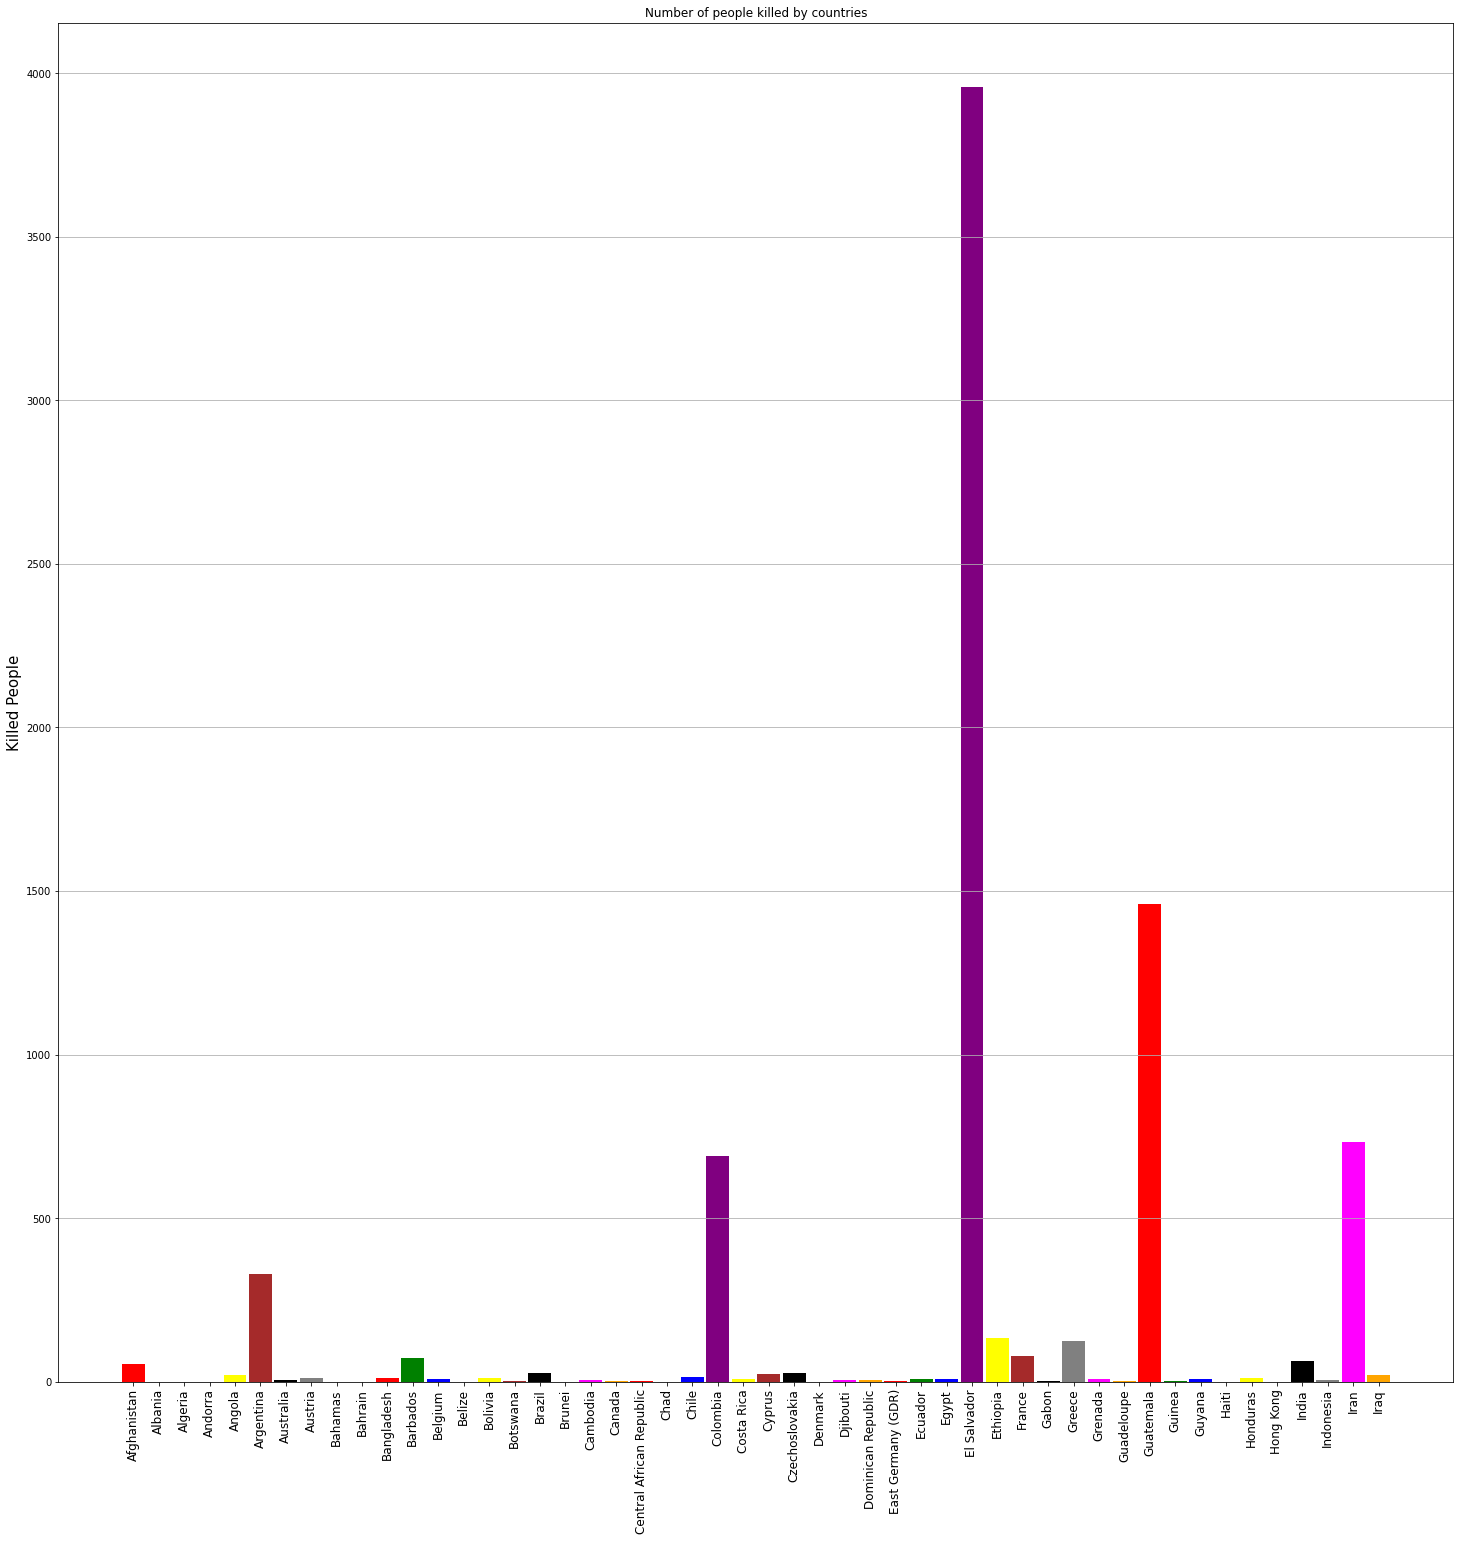

In [26]:
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

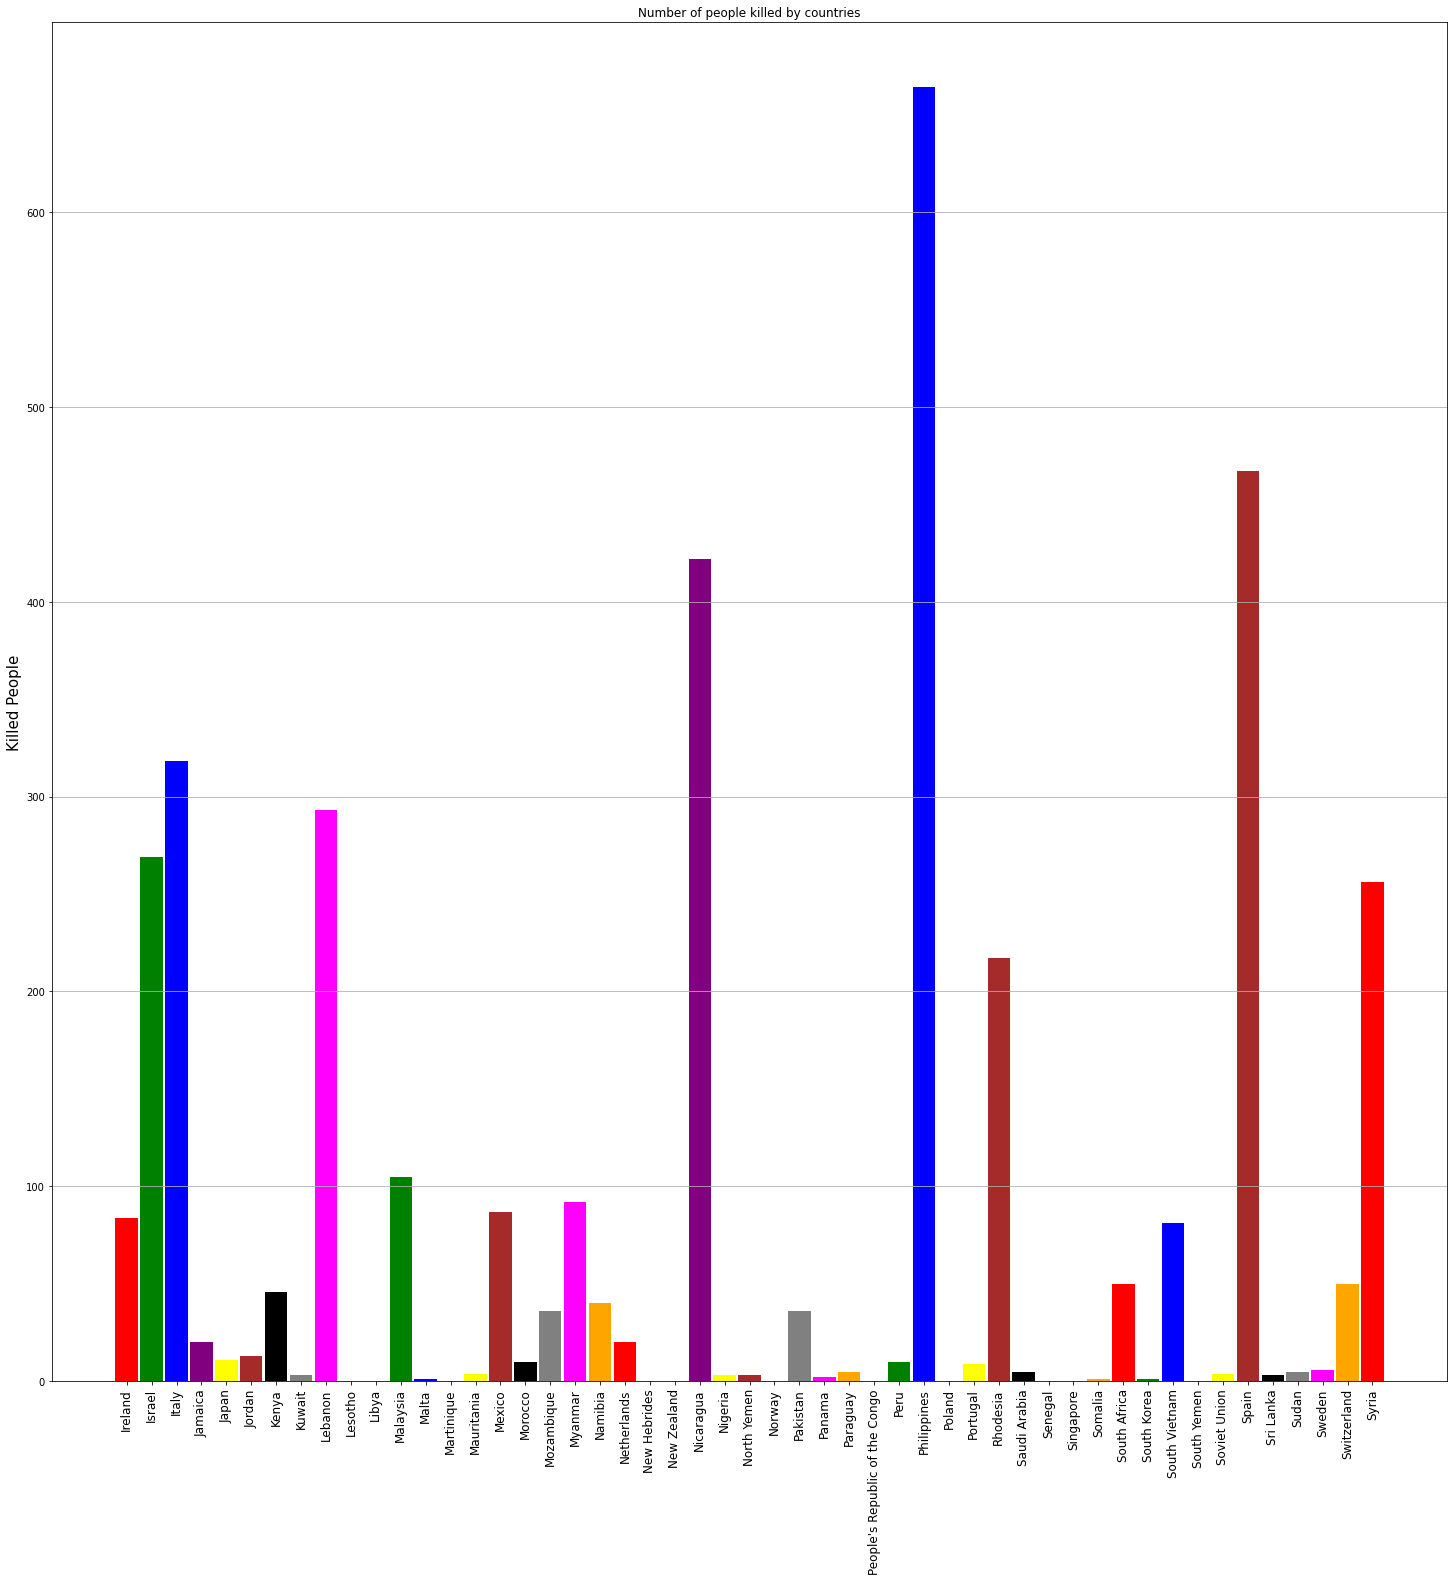

In [27]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

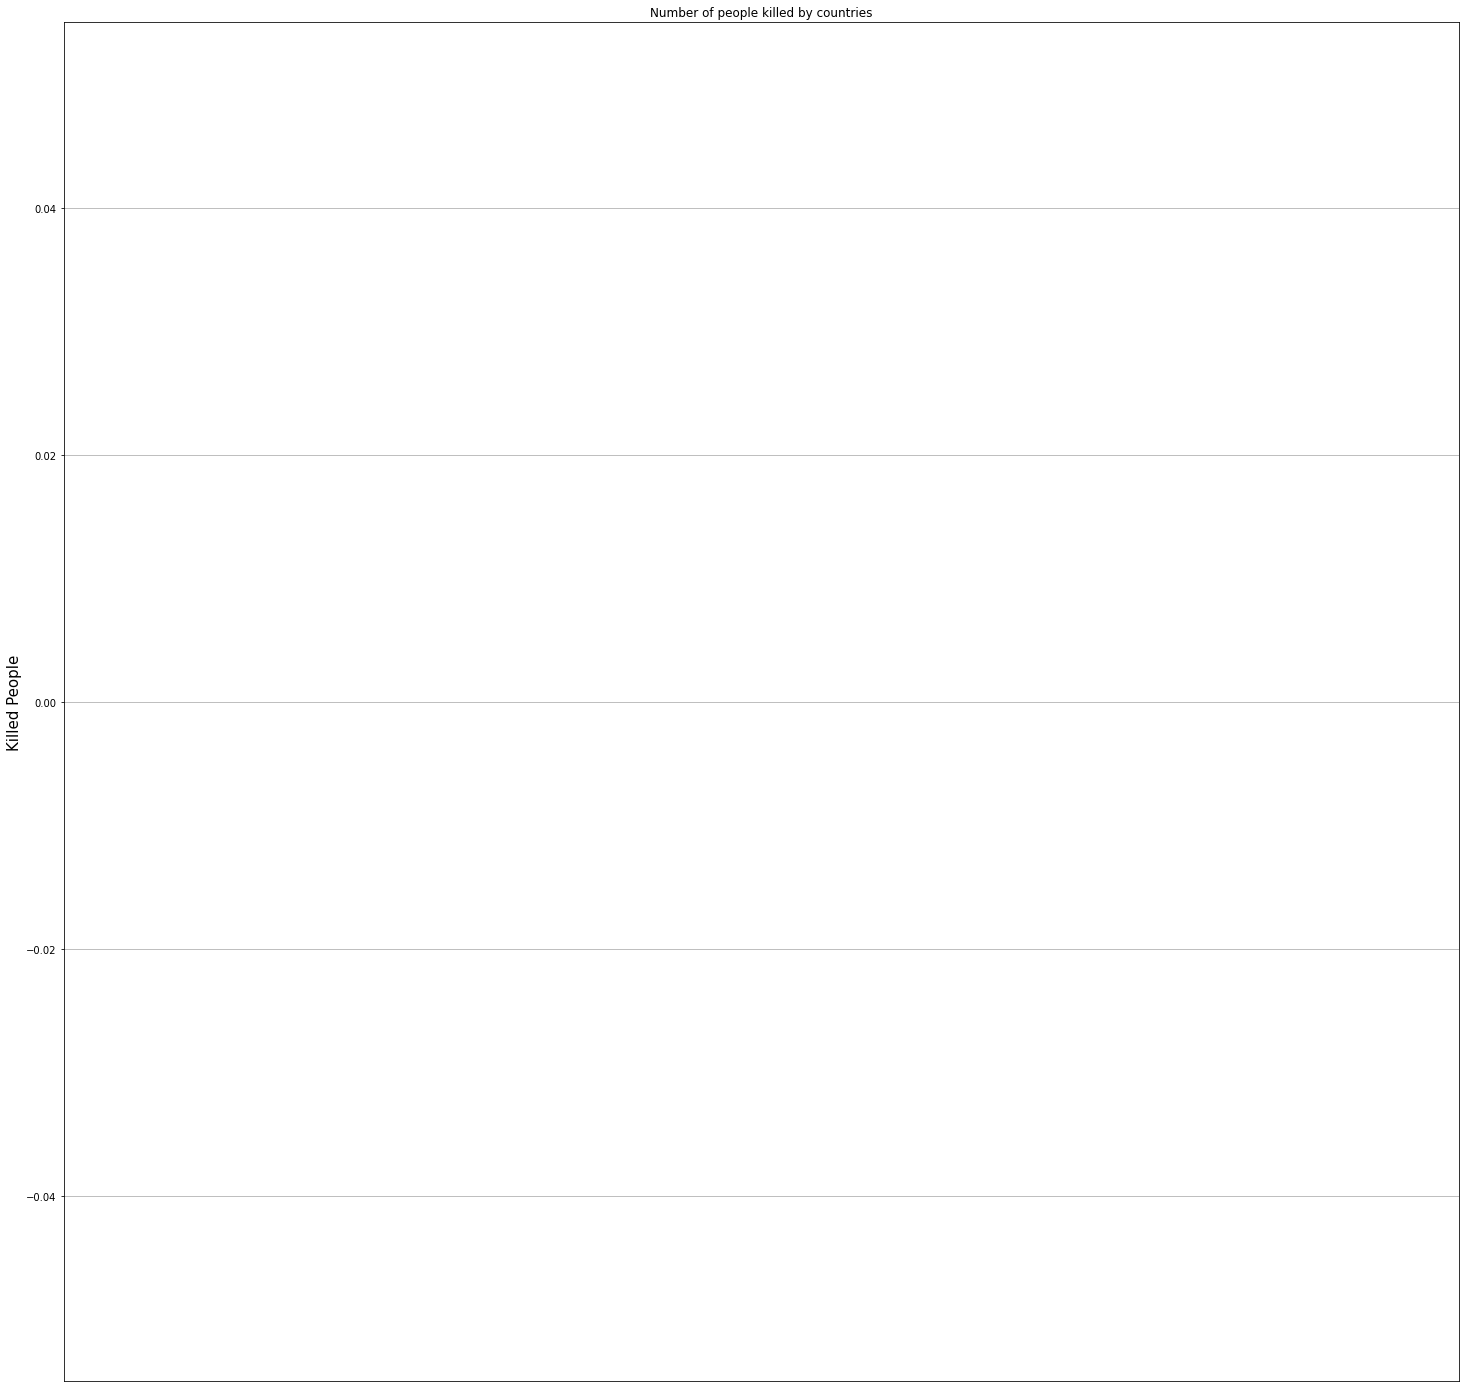

In [28]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.